In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df_data = pd.read_csv("new_model.csv")
df_data

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


(array([150.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 250.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

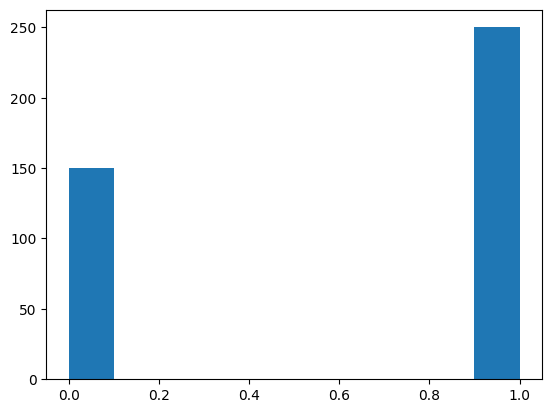

In [ ]:
plt.hist(df_data["Class"])

<Axes: >

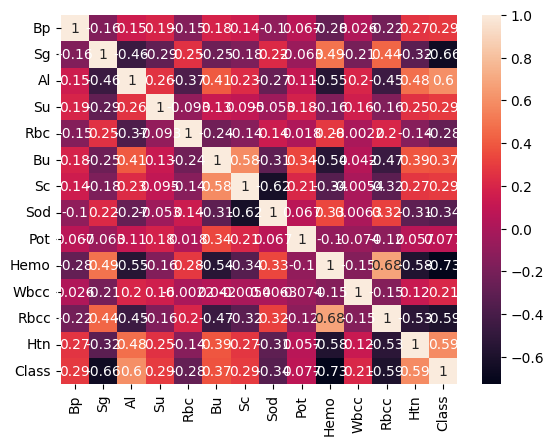

In [ ]:
sns.heatmap(df_data.corr(), annot=True)

<Axes: xlabel='Sc', ylabel='Bu'>

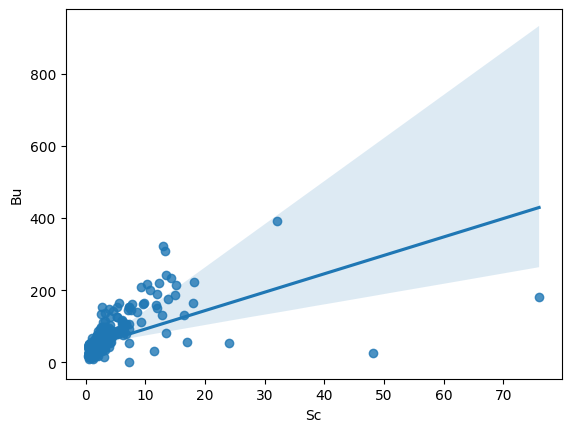

In [ ]:
sns.regplot(x="Sc", y="Bu", data=df_data)

<Axes: xlabel='Sg', ylabel='Hemo'>

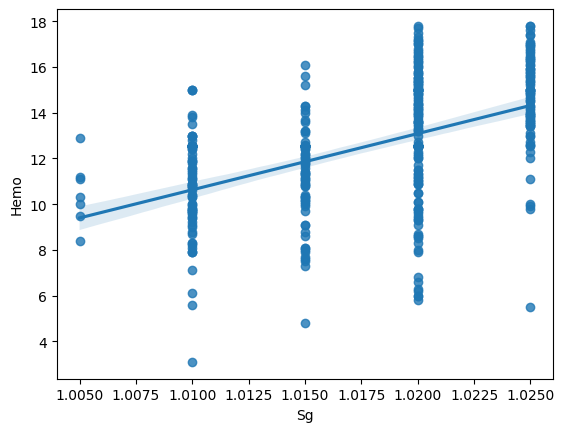

In [ ]:
sns.regplot(x="Sg", y="Hemo", data=df_data)

(array([251.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

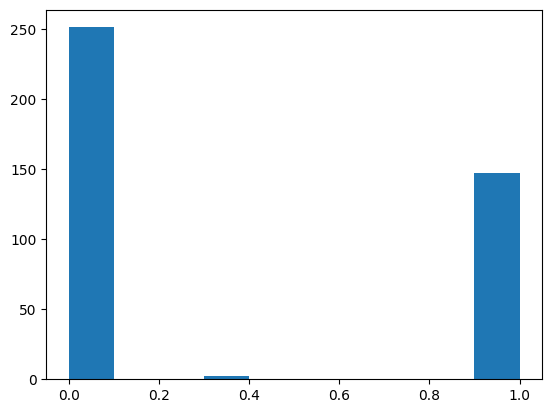

In [ ]:
plt.hist(df_data["Htn"])

In [ ]:
X = df_data[["Bp", "Al", "Su", "Bu", "Sc", "Htn"]].values
y = df_data["Class"]
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape


(320,)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(6,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
10/10 [==============================] - 0s 15ms/step - loss: 0.0706 - accuracy: 0.9625 - val_loss: 0.6202 - val_accuracy: 0.9500
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0589 - accuracy: 0.9688 - val_loss: 0.6420 - val_accuracy: 0.9500
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0635 - accuracy: 0.9594 - val_loss: 0.6144 - val_accuracy: 0.9625
Epoch 4/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0629 - accuracy: 0.9719 - val_loss: 0.6540 - val_accuracy: 0.9375
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0549 - accuracy: 0.9719 - val_loss: 0.6292 - val_accuracy: 0.9500
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0580 - accuracy: 0.9719 - val_loss: 0.6463 - val_accuracy: 0.9500
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0688 - accuracy: 0.9594 - val_loss: 0.5791 - val_accuracy: 0.9625
Epoch 8/200


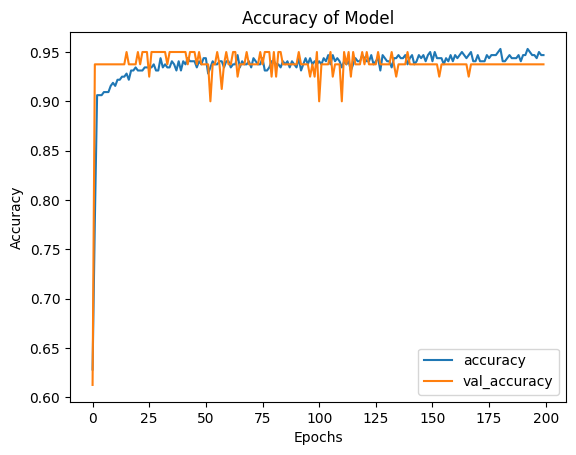

In [ ]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of Model")
plt.legend()
plt.show()

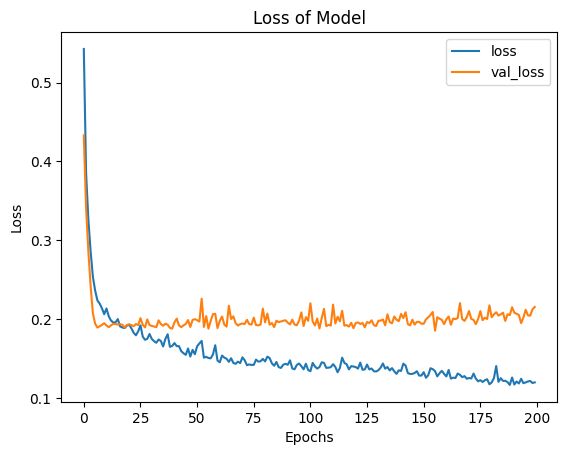

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of Model")
plt.legend()
plt.show()

In [ ]:
inp = input("enter a blood pressure")
new_data = np.array([[inp, 0.0, 0.0, 18, 1.2, 0.0]])

# Scale the new data using the same Min-Max scaler
scaled_new_data = min_max_scaler.transform(new_data)

# Make predictions
predicted_probabilities_single = model.predict(scaled_new_data)
if int(predicted_probabilities_single[0][0]) == 1:
  print("The model indicates a presence of kidney disease")
else:
  print("The model indicates an absence of kidney disease")


enter a blood pressure120
1/1 [==============================] - 0s 29ms/step
The model indicates a presence of kidney disease
